# Support Vector Machine (SVM thuần, Hard Margin SVM)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
np.random.seed(2)
means =[[2,2],[4,2]]
cov  = [[0.3,0.2],[0.2,0.3]]
N = 10
X1 = np.random.multivariate_normal(means[0],cov,N)
X2 = np.random.multivariate_normal(means[1],cov,N)
X = np.concatenate((X1,X2), axis = 0) # all data
# y = np.concatenate((np.ones((1,N)),-np.ones((1,N))), axis =1 ) # labels
y = np.asarray([1]*N+ [-1]*N).T # labels
print('X: ',X)
print(y)
from sklearn.svm import SVC
clf = SVC( kernel ='linear',C =1e5)
print(clf)
clf.fit(X,y)
w = clf.coef_ # trọng số w
b = clf.intercept_ # bias (Bị chặn)
print('w: ',w.T)
print('b: ', b)

X:  [[2.22096057 2.19579728]
 [2.70132234 3.43487375]
 [3.08493823 2.70849736]
 [2.02701417 1.47010441]
 [2.73223639 2.32571583]
 [1.21171968 2.23682627]
 [2.22920603 1.72925457]
 [1.8637762  1.59716548]
 [1.74682699 2.27230351]
 [2.37191737 2.37595358]
 [4.47403369 2.4040742 ]
 [4.09281249 1.65061706]
 [4.22222334 2.11659863]
 [4.58438569 2.05326933]
 [4.74493118 2.67628604]
 [3.6355797  2.63347726]
 [5.19217738 3.2425902 ]
 [3.51075436 2.11880111]
 [3.93784332 1.56029947]
 [3.8787214  2.12126884]]
[ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
w:  [[-3.51459137]
 [ 0.85239658]]
b:  [9.53306327]


# Soft Margin SVM
Dùng thư viện Sklearn

X [[2.22096057 2.19579728]
 [2.70132234 3.43487375]
 [3.08493823 2.70849736]
 [2.02701417 1.47010441]
 [2.73223639 2.32571583]
 [1.21171968 2.23682627]
 [2.22920603 1.72925457]
 [1.8637762  1.59716548]
 [1.74682699 2.27230351]
 [2.37191737 2.37595358]
 [4.47403369 1.4040742 ]
 [4.09281249 0.65061706]
 [4.22222334 1.11659863]
 [4.58438569 1.05326933]
 [4.74493118 1.67628604]
 [3.6355797  1.63347726]
 [5.19217738 2.2425902 ]
 [3.51075436 1.11880111]
 [3.93784332 0.56029947]
 [2.7        2.        ]]
y [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


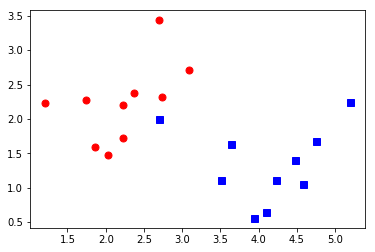

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
w:  [[ 9.07560196 -7.75384535]]
b:  -7.996751353339568


In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
means =[[2,2],[4,1]]
cov = [[0.3,0.2],[0.2,0.3]]
N =10
X1 = np.random.multivariate_normal(means[0],cov,N)
X2 = np.random.multivariate_normal(means[1],cov,N)
X2[-1,:] =[2.7,2]
X = np.concatenate((X1,X2), axis =0)
y = np.asarray([0]*N+ [1]*N).T
print('X',X)
print('y',y)
plt.plot(X1[:,0],X1[:,1],'ro', markersize =7)
plt.plot(X2[:,0],X2[:,1],'bs', markersize =7)
plt.show()
# import library sklearn
from sklearn.svm import SVC
C =100
clf = SVC(kernel ='linear', C =100)
print(clf)
clf.fit(X,y)
w = clf.coef_
b = clf.intercept_
print('w: ',w)
print('b: ',b[0])

 Tìm nghiệm bằng cách giải bài toán đối ngẫu

In [ ]:
from cvxopt import matrix, solvers # not import cvxopt
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))

h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))
A = matrix(y.reshape((-1, 2*N))) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

S = np.where(l > 1e-5)[0] # support set 
S2 = np.where(l < .999*C)[0] 

M = [val for val in S if val in S2] # intersection of two lists

XT = X.T # we need each column to be one data point in this alg
VS = V[:, S]
lS = l[S]
yM = y[M]
XM = XT[:, M]

w_dual = VS.dot(lS).reshape(-1, 1)
b_dual = np.mean(yM.T - w_dual.T.dot(XM))
print(w_dual.T, b_dual) 

Tìm nghiệm bằng giải bài toán không ràng buộc

In [29]:
print(X1)
X0_bar = np.vstack((X1.T, np.ones((1,N)))) # extend data
print(X1_bar)
X1_bar = np.vstack((X2.T, np.ones((1,N)))) # extend data

Z = np.hstack((X0_bar, -X1_bar))
print(Z)
lam = 1/C

def cost(w):
    u = w.T.dot(Z) # as in (23)
    return (np.sum(np.maximum(0, 1 - u)) + \
        .5*lam*np.sum(w*w)) - .5*lam*w[-1]*w[-1] # no bias 

def grad(w):
    u = w.T.dot(Z) # as in (23)
    H = np.where(u < 1)[1]
    ZS = Z[:, H]
    g = (-np.sum(ZS, axis = 1, keepdims = True) + lam*w)
    g[-1] -= lam*w[-1] # no weight decay on bias
    return g


def num_grad(w):
    eps = 1e-6
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps 
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

w0 = np.random.randn(X0_bar.shape[0], 1) 
g1 = grad(w0)
g2 = num_grad(w0)
diff = np.linalg.norm(g1 - g2)
print('Gradient different: %f' %diff)

def grad_descent(w0, eta):
    w = w0
    it = 0 
    while it < 100000:
        it = it + 1
        g = grad(w)
        w -= eta*g
        if (it % 10000) == 1:
            print('iter %d' %it + ' cost: %f' %cost(w))
        if np.linalg.norm(g) < 1e-5:
            break 
    return w 
w0 = np.random.randn(X0_bar.shape[0], 1) 
w = grad_descent(w0, 0.001)
w_hinge = w[:-1].reshape(-1, 1)
b_hinge = w[-1]
print(w_hinge.T, b_hinge)

[[2.22096057 2.19579728]
 [2.70132234 3.43487375]
 [3.08493823 2.70849736]
 [2.02701417 1.47010441]
 [2.73223639 2.32571583]
 [1.21171968 2.23682627]
 [2.22920603 1.72925457]
 [1.8637762  1.59716548]
 [1.74682699 2.27230351]
 [2.37191737 2.37595358]]
[[2.22096057 2.70132234 3.08493823 2.02701417 2.73223639 1.21171968
  2.22920603 1.8637762  1.74682699 2.37191737]
 [2.19579728 3.43487375 2.70849736 1.47010441 2.32571583 2.23682627
  1.72925457 1.59716548 2.27230351 2.37595358]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]]
[[ 2.22096057  2.70132234  3.08493823  2.02701417  2.73223639  1.21171968
   2.22920603  1.8637762   1.74682699  2.37191737 -4.47403369 -4.09281249
  -4.22222334 -4.58438569 -4.74493118 -3.6355797  -5.19217738 -3.51075436
  -3.93784332 -2.7       ]
 [ 2.19579728  3.43487375  2.70849736  1.47010441  2.32571583  2.23682627
   1.72925457  1.59716548  2.27230351  2.37595358 -1.4040742  -0.65061706
  -1.11659863 

# Kernel SVM 

[[0 0]
 [1 1]
 [1 0]
 [0 1]]


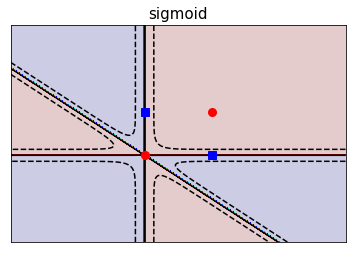

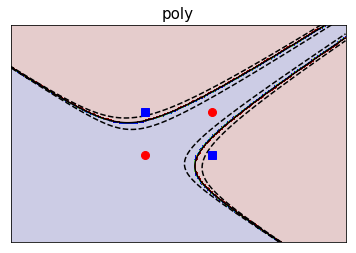

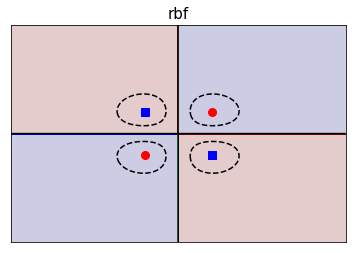

In [34]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
# XOR dataset and targets
X = np.c_[(0,0), (1,1),(1,0),(0,1)].T
print(X)
Y = [0]*2 + [1]*2
# figure number
fignum = 1
# fit the model
for kernel in ('sigmoid','poly','rbf'):
    clf = SVC(kernel =kernel , gamma =4, coef0 =0)
    clf.fit(X,Y)
    # plot the line, the points, and the nearest vectors to the plane
    fig, ax = plt.subplots()
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='None')
    plt.plot(X[:2, 0], X[:2, 1], 'ro', markersize = 8)
    plt.plot(X[2:, 0], X[2:, 1], 'bs', markersize = 8)

    plt.axis('tight')
    x_min, x_max = -2, 3
    y_min, y_max = -2, 3
        
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
    plt.title(kernel, fontsize = 15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

# Bài toán phân biệt giới tính

In [64]:
from sklearn.svm import SVC
import scipy.io as sio
from sklearn.metrics import accuracy_score
A = sio.loadmat('myARgender.mat') # dữ liệu ảnh đã qua xử lý
print(A)
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print('Xtrain : ', X_train)
print('Xtest: ', X_test.shape)
N = 700
y_train = A['label_train'].reshape(N)
print(y_train.shape)
y_test  = A['label_test'].reshape(N)

clf = SVC(kernel ='poly', degree =3, gamma =1, C =100)
print(clf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy_score: ', 100*accuracy_score(y_pred, y_test))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 29 11:17:59 2016', '__version__': '1.0', '__globals__': [], 'label_train': array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1,